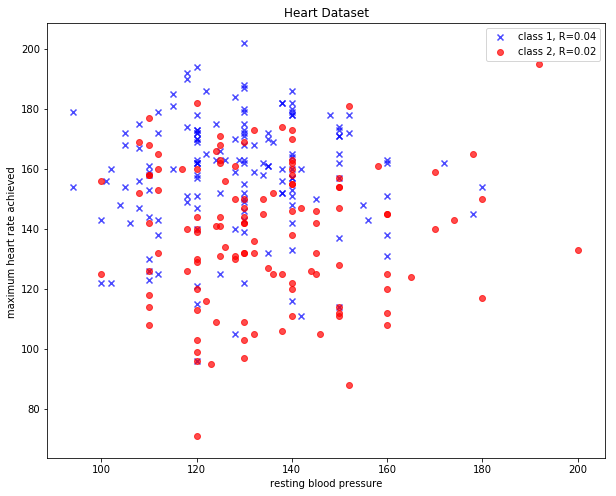

In [22]:
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
#меняем значения столбцов
def swap(index1, index2, iterable):
    for x in iterable:
        x[index1],x[index2]=x[index2],x[index1]

# чтение данных
dataset = np.loadtxt(open("heart.dat","r"), delimiter=",", skiprows=0, dtype=np.float64)

r1=3 #resting blood pressure 
r2=7 #maximum heart rate achieved 

X = dataset[:, 0 : -1] # атрибуты

#меняем первую столбец и вторую столбец с столбцами под номерами r1 и r2
swap(0, r1, X)
swap(1, r2, X)

y =  (dataset[:, -1]).astype(np.int64, copy=False) # классы  

plt.figure(figsize=(10, 8))


for label, marker, color in zip(range(1,3), ('x', 'o'), ('blue', 'red')):
   # Вычисление коэффициента корреляции Пирсона
    R = pearsonr(X[:, 0][y == label], X[:, 1][y == label])
    plt.scatter(x=X[:, 0][y == label],
               y=X[:, 1][y == label],
               marker=marker,
               color=color,
               alpha=0.7,
               label='class {:}, R={:.2f}'.format(label, R[0])  # label for the legend
               )
plt.title('Heart Dataset')
plt.xlabel('resting blood pressure')
plt.ylabel('maximum heart rate achieved ')
plt.legend(loc='upper right')
plt.show()


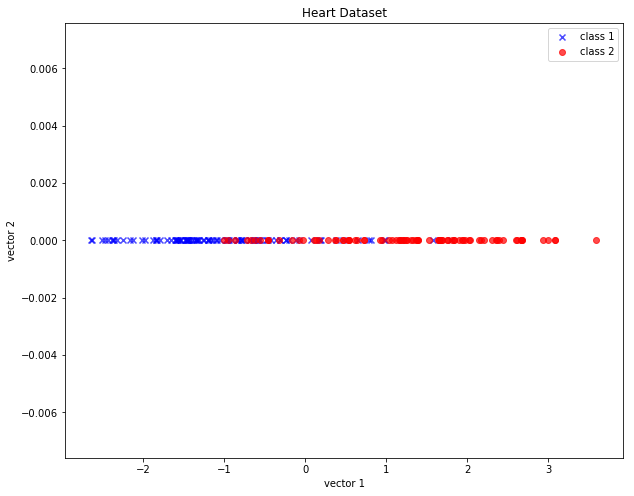

In [31]:
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3, random_state=55)
lda=LDA()
transform=lda.fit_transform(data_train,class_train)
plt.figure(figsize=(10, 8))


for label, marker, color in zip(range(1,3), ('x', 'o'), ('blue', 'red')):
    plt.scatter(x=transform[:, 0][class_train == label],
               y=np.zeros(len(transform[:, 0][y_train == label])),
               marker=marker,
               color=color,
               alpha=0.7,
               label='class {}'.format(label)  # label for the legend
               )
plt.title('Heart Dataset')
plt.xlabel('vector 1')
plt.ylabel('vector 2')
plt.legend()
plt.show()



In [30]:
pred_train_lda = lda.predict(data_train)
pred_test_lda = lda.predict(data_test)

print('Точность классификации на обучающем наборе данных (LDA)',
     '{:.2%}'.format(metrics.accuracy_score(class_train, pred_train_lda)))



print('Точность классификации на тестовом наборе данных (LDA)',
      '{:.2%}'.format(metrics.accuracy_score(class_test, pred_test_lda)))

qda = QDA()
qda.fit(data_train, class_train)
pred_train_qda = qda.predict(data_train)
pred_test_qda = qda.predict(data_test)

print('Точность классификации на обучающем наборе данных (QDA)',
      '{:.2%}'.format(metrics.accuracy_score(class_train, pred_train_qda)))

print('Точность классификации на тестовом наборе данных (QDA)',
      '{:.2%}'.format(metrics.accuracy_score(class_test, pred_test_qda)))

Точность классификации на обучающем наборе данных (LDA) 86.24%
Точность классификации на тестовом наборе данных (LDA) 82.72%
Точность классификации на обучающем наборе данных (QDA) 87.83%
Точность классификации на тестовом наборе данных (QDA) 82.72%
